Importing Cifar 10 data set from Keras.datasets

In [1]:
from keras.datasets import cifar10

Splitting Cifar data set into training data and testing data

In [2]:
(training_X, training_y), (testing_X, testing_y) = cifar10.load_data()

Checking the shape of Training dataset and testing dataset

In [3]:
print('Training data shape: X=%s, y=%s' % (training_X.shape, training_y.shape))
print('Testing data shape: X=%s, y=%s' % (testing_X.shape, testing_y.shape))

Training data shape: X=(50000, 32, 32, 3), y=(50000, 1)
Testing data shape: X=(10000, 32, 32, 3), y=(10000, 1)


In [4]:
from matplotlib import pyplot

printing 1st nine images in the tarining dataset 

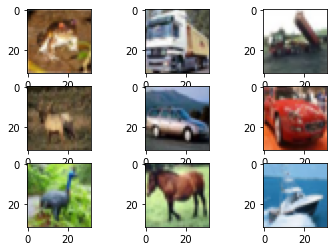

In [5]:
for i in range(9):
    # defining subplot size 
    pyplot.subplot(330 + 1 + i)
    # ploting data
    pyplot.imshow(training_X[i])
pyplot.show()

Normalizing the data of Training and testing datas sets by deviding it with 255 because the highest value is 255 .It gives us the values between 0 and 1 so that it becomes for our model to predict

In [6]:
training_X = training_X/255
testing_X = testing_X/255
print('Max = ',training_X.max())
print('Min = ',training_X.min())

Max =  1.0
Min =  0.0


Creating encoding and decoding layers in the model. The input will be in the actual shape but while passing
through the layers the input shape will be compressed ansd we will have a whole new data at encoder output layer.This output will be given to decoder 
so that now we will recostruct the data from the avilable data 

In [7]:
import keras
from keras import layers

In [8]:
encoder_ip = keras.Input(shape=(3072,), name = 'img') # input layer with shape 3072
x = keras.layers.Flatten()(encoder_ip)
#x = keras.layers.Dense(972,activation = 'relu')(x)
encoder_op = keras.layers.Dense(432,activation = 'relu')(x)
encodermodel = keras.Model(encoder_ip,encoder_op,name = 'encoder')
#decoder_input = keras.layers.Dense(972,activation = 'sigmoid')(encoder_output)
decoder_op = keras.layers.Dense(3072,activation = 'sigmoid')(encoder_op)
#decoder_output = keras.layers.Reshape(())(decoder_input)
autoencoder = keras.Model(encoder_ip,decoder_op,name = "autoencoder")
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 3072)]            0         
_________________________________________________________________
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 432)               1327536   
_________________________________________________________________
dense_1 (Dense)              (None, 3072)              1330176   
Total params: 2,657,712
Trainable params: 2,657,712
Non-trainable params: 0
_________________________________________________________________


In [9]:
training_X.shape
training_X = training_X.reshape(50000,3072)

In [10]:
autoencoder.compile(loss = 'binary_crossentropy', optimizer = 'adam')
autoencoder.fit(training_X,training_X,epochs =20, batch_size = 32,validation_split = 0.2)

Epoch 1/20
1250/1250 [==============================] - 19s 14ms/step - loss: 0.6070 - val_loss: 0.5891
Epoch 2/20
1250/1250 [==============================] - 17s 14ms/step - loss: 0.5830 - val_loss: 0.5786
Epoch 3/20
1250/1250 [==============================] - 18s 14ms/step - loss: 0.5758 - val_loss: 0.5750
Epoch 4/20
1250/1250 [==============================] - 18s 14ms/step - loss: 0.5740 - val_loss: 0.5738
Epoch 5/20
1250/1250 [==============================] - 18s 14ms/step - loss: 0.5731 - val_loss: 0.5748
Epoch 6/20
1250/1250 [==============================] - 19s 15ms/step - loss: 0.5723 - val_loss: 0.5729
Epoch 7/20
1250/1250 [==============================] - 18s 14ms/step - loss: 0.5723 - val_loss: 0.5726
Epoch 8/20
1250/1250 [==============================] - 18s 15ms/step - loss: 0.5721 - val_loss: 0.5725
Epoch 9/20
1250/1250 [==============================] - 18s 14ms/step - loss: 0.5719 - val_loss: 0.5727
Epoch 10/20
1250/1250 [==============================] - 18s 15m

In [11]:
img = autoencoder.predict(training_X)
encoder_data = encodermodel.predict(training_X)


In [12]:
encoder_data.shape

(50000, 432)

plotting the actual images and the images generated by the model after encodeing and decoding phase.There will be loss in 
information but we will get approximately similar images 

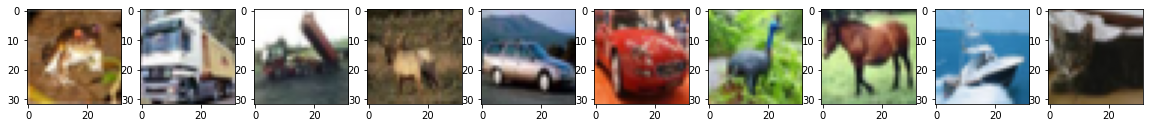

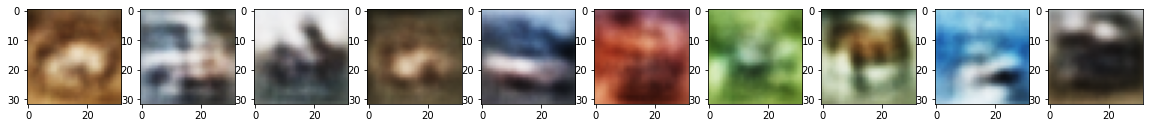

In [13]:
x_train = training_X.reshape(50000,32,32,3)
pyplot.figure(figsize=(20,20))
for i in range(10):
    pyplot.subplot(1,10,i+1)
    pyplot.imshow(x_train[i])
pyplot.show()

img = img.reshape(50000,32,32,3)
pyplot.figure(figsize=(20,20))
for i in range(10):
    pyplot.subplot(1,10,i+1)
    pyplot.imshow(img[i])
pyplot.show()

Generating clusters by using sparse data obatined after encoding.We will use Kmean function in sklearn.clusters 
and then we will use silhoutte_score to analyse the quality of clusters

In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
clusters = KMeans(n_clusters = 10,random_state = 10)
clustered_data = clusters.fit_predict(encoder_data)
shi_avg = silhouette_score(encoder_data,clustered_data)
print('silhoutte_score :',shi_avg)

silhoutte_score : 0.051796593
